In [20]:
__author__ = 'dilmiperera'

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Load stats
import scipy.stats as stats

# Load matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

# Load scikit's classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, file='', proba=True, skip=0,):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
        
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.8, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.8, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    print("fpr",fpr)
    print("tpr",tpr)
    print("thresholds",thresholds)
    plt.savefig(file)
    return ax

In [4]:
def make_pr(name, clf, ytest, xtest, ax=None, labe=5, file='', proba=True, skip=0,):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(xtest)[:,1])
        average_precision = average_precision_score(y_test, clf.predict_proba(xtest)[:,1])
        
    else:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.decision_function(xtest))
        average_precision = average_precision_score(y_test, clf.decision_function(xtest))
    
    if skip:
        l=recall.shape[0]
        ax.plot(recall[0:l:skip], precision[0:l:skip], '.-', alpha=0.8, label='PR curve for %s (area = %0.2f)' % (name, average_precision))
    else:
        ax.plot(recall, precision, '.-', alpha=0.8, label='PR curve for %s (area = %0.2f)' % (name, average_precision))
    
    if initial:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('Precision-Recall')
    ax.legend(loc="lower right")
    print("recall",recall)
    print("precision",precision)
    print("thresholds",thresholds)
    plt.savefig(file)
    return ax

In [5]:
def make_pr_true(name, clf, ytest, xtest, ax=None, labe=5, file='', proba=True, skip=0,):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(xtest)[:,1])
        average_precision = average_precision_score(y_test, clf.predict_proba(xtest)[:,1])
        
    else:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.decision_function(xtest))
        average_precision = average_precision_score(y_test, clf.decision_function(xtest))
    
    precision=7*(precision-0.001)/(27-20*precision)
    if skip:
        l=recall.shape[0]
        ax.plot(recall[0:l:skip], precision[0:l:skip], '.-', alpha=0.8, label='PR curve for %s ' % (name))
    else:
        ax.plot(recall, precision, '.-', alpha=0.8, label='PR curve for %s ' % (name))
    
    if initial:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('Precision-Recall (90:10)')
    ax.legend(loc="lower right")
    print("recall",recall)
    print("precision",precision)
    print("thresholds",thresholds)
    plt.savefig(file)
    return ax

&nbsp;

&nbsp;

# Classification of papillary microcarcinoma (PMC) patients for surgery (pN1) or active surveillance (pN0) using NanoString gene expression data and mutation data from tumour biopsies

## Description of the dataset

### Patients
Formalin-fixed paraffin-embedded PMC samples from 40 patients with lateral neck nodal metastases (pN1b) and 71 PMC patients with documented absence of nodal disease (pN0).

### Measures
To interrogate DNA alterations in 410 genes commonly mutated in cancer and test for differential gene expression using a custom NanoString panel of 248 genes selected primarily based on their association with tumor size and nodal disease in the papillary thyroid cancer TCGA project.

### Classification problem
Classify patients into N1 and N0 using gene expression and mutation data

In [6]:
data=pd.read_csv('ALL_normalized_log2_data_loginv_QC_filtered-for_Model.txt', sep='\t')
sex_factorized=(data['Sex'].values=='F')*1
BRAF_factorised=(data['BRAF V600E called'].values=='Y')*1
TERT_factorized=(data['TERT Promoter called'].values=='Y')*1
data['Sex']=sex_factorized
data['BRAF V600E called']=BRAF_factorised
data['TERT Promoter called']=TERT_factorized
temp=data[data.columns[1:(len(data.columns))]]
data=temp
data.head()
#data

,ZNF652,NECAB1,ERCC2,SDC1,TFRC,JAZF1,NME1,ZNF708,HGD,TACSTD2,...,SNRPB,CDH4,GLT8D2,C7orf49,GABRB2,TCL6,Sex,BRAF V600E called,TERT Promoter called,Nodal Status
0,147.379719,7.647061,156.417155,446.310283,328.128432,447.005470,431.016161,109.144415,62.566862,9.732623,...,784.171338,38.930492,117.486663,155.026780,878.716818,2.780749,1,1,0,N0
1,179.570016,9.943617,113.474212,266.137972,383.121695,388.970882,389.555800,153.833597,112.304375,12.283291,...,690.203970,5.264268,99.436165,151.493922,105.285351,7.019023,1,0,0,N0
2,161.889657,28.746761,133.142895,441.792335,422.123498,496.259883,266.285791,107.422109,261.746828,13.616887,...,632.428753,10.590912,453.896234,96.831197,98.344184,9.077925,1,1,0,N1
3,172.637209,13.554161,169.070325,265.376206,303.185182,396.637556,435.159908,166.216817,117.707188,22.114684,...,699.822737,13.554161,268.229714,154.089410,296.051413,5.707015,1,1,0,N1
4,183.692953,16.356222,161.045877,349.771514,596.373012,347.255172,344.738830,169.853073,149.722339,17.614393,...,664.314242,13.839880,202.565517,130.849775,421.487256,12.581709,1,1,0,N1


In [7]:
data_labels = data.columns[0:(len(data.columns)-3)]

data_labels
X_all = data[data_labels].as_matrix()
#y_all = pd.factorize(data['Nodal Status'])[0]
y_all=(data['Nodal Status'].values=='N1')*1
len(y_all)

101

## Train - Test Split

Stratified split of the data set into training and independant testing set (Training:testing split 60:40). Use training set with cross validation during training, use testing set for model selection.

In [11]:
# Split testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.40,stratify=y_all, random_state=5)
#print("Fraction of N1 in training set: " ,sum(y_train),"/",len(y_train))

## Model Selection

Since dataset with large p, small n, start with simpler models like logistic regression and use models with regularization.

 - Logistic Regression with l2 regularization
 - Logistic Regression with l1 regularization
 - Random Forest
 - AdaBoost
 - Gradient Boosting
 

## Logistic Regression with l2 regularization 

In [17]:
num_of_crossval = 6

tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training starting ... ')
model=LogisticRegression(C=100,penalty='l2')
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted',cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.cv_results_)
print(gsCV.best_estimator_)


Fold : 0
Training starting ... 
Create model ... 
Training complete ... 
{'C': 1000}
{'mean_fit_time': array([0.00780785, 0.00705071, 0.00469379, 0.00526639, 0.00502992]), 'std_fit_time': array([0.00344894, 0.00061441, 0.00063952, 0.00084011, 0.00088329]), 'mean_score_time': array([0.00165439, 0.00147581, 0.00073604, 0.00103251, 0.0009139 ]), 'std_score_time': array([8.13770961e-04, 3.51616107e-04, 5.66584780e-05, 2.65803986e-04,
       1.98957241e-04]), 'param_C': masked_array(data=[1000, 100, 10, 1.0, 0.1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1000}, {'C': 100}, {'C': 10}, {'C': 1.0}, {'C': 0.1}], 'split0_test_score': array([0.79924242, 0.79924242, 0.79924242, 0.79924242, 0.79924242]), 'split1_test_score': array([0.70989011, 0.70989011, 0.70989011, 0.70989011, 0.70989011]), 'split2_test_score': array([0.70909091, 0.70909091, 0.70909091, 0.70909091, 0.70909091]), 'split3_test_score': array([0.8, 0.8, 

fpr [0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 0.17857143 0.17857143 0.21428571 0.21428571 0.53571429
 0.53571429 0.60714286 0.60714286 1.        ]
tpr [0.         0.07692308 0.53846154 0.53846154 0.61538462 0.61538462
 0.69230769 0.69230769 0.76923077 0.76923077 0.84615385 0.84615385
 0.92307692 0.92307692 1.         1.        ]
thresholds [2.00000000e+00 1.00000000e+00 9.02402720e-01 5.82027857e-01
 1.75044487e-01 1.32048315e-02 6.44822754e-03 6.86334461e-04
 3.41498505e-04 2.11287144e-04 9.19222546e-05 2.71113139e-08
 1.61092370e-08 4.83744240e-10 4.44699406e-10 5.34394697e-23]


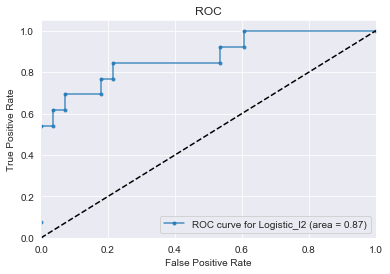

In [21]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_roc("Logistic_l2",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [1.         0.92307692 0.92307692 0.92307692 0.84615385 0.84615385
 0.84615385 0.84615385 0.84615385 0.84615385 0.84615385 0.84615385
 0.84615385 0.84615385 0.76923077 0.76923077 0.69230769 0.69230769
 0.69230769 0.69230769 0.61538462 0.61538462 0.53846154 0.53846154
 0.46153846 0.38461538 0.30769231 0.23076923 0.15384615 0.07692308
 0.        ]
precision [0.43333333 0.4137931  0.42857143 0.44444444 0.42307692 0.44
 0.45833333 0.47826087 0.5        0.52380952 0.55       0.57894737
 0.61111111 0.64705882 0.625      0.66666667 0.64285714 0.69230769
 0.75       0.81818182 0.8        0.88888889 0.875      1.
 1.         1.         1.         1.         1.         1.
 1.        ]
thresholds [4.44699406e-10 4.83744240e-10 9.02352814e-09 1.61092370e-08
 2.71113139e-08 9.32597592e-08 3.03576110e-07 4.54486912e-07
 7.05020965e-07 1.21744134e-06 1.45702106e-06 1.54242370e-05
 7.52877144e-05 9.19222546e-05 2.11287144e-04 3.41498505e-04
 6.86334461e-04 7.78603249e-04 1.55276639e-03 6.448227

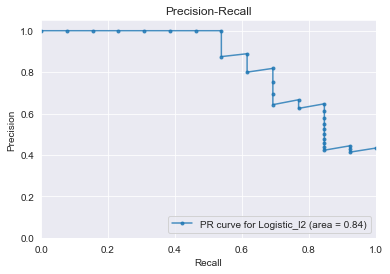

In [22]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("Logistic_l2",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [1.         0.92307692 0.92307692 0.92307692 0.84615385 0.84615385
 0.84615385 0.84615385 0.84615385 0.84615385 0.84615385 0.84615385
 0.84615385 0.84615385 0.76923077 0.76923077 0.69230769 0.69230769
 0.69230769 0.69230769 0.61538462 0.61538462 0.53846154 0.53846154
 0.46153846 0.38461538 0.30769231 0.23076923 0.15384615 0.07692308
 0.        ]
precision [0.16507273 0.15432228 0.16241085 0.17139264 0.15937344 0.16884615
 0.17951402 0.19161845 0.20547059 0.22147839 0.2401875  0.26234471
 0.289      0.32167782 0.30124138 0.34095122 0.31768687 0.36788889
 0.43691667 0.53780342 0.50845455 0.67393976 0.644      0.999
 0.999      0.999      0.999      0.999      0.999      0.999
 0.999     ]
thresholds [4.44699406e-10 4.83744240e-10 9.02352814e-09 1.61092370e-08
 2.71113139e-08 9.32597592e-08 3.03576110e-07 4.54486912e-07
 7.05020965e-07 1.21744134e-06 1.45702106e-06 1.54242370e-05
 7.52877144e-05 9.19222546e-05 2.11287144e-04 3.41498505e-04
 6.86334461e-04 7.78603249e-04 1.55276639e

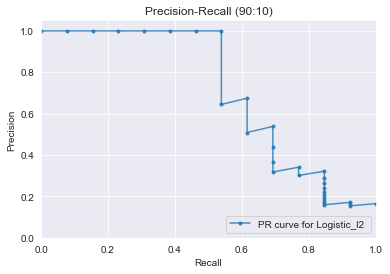

In [23]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Logistic_l2",gsCV.best_estimator_ , y_test, X_test, labe=15)

In [24]:
best_features=gsCV.best_estimator_.coef_[0]
feature_importance=pd.DataFrame(best_features,columns=['Importance'])
feature_importance['Features']=data_labels

feature_importance

,Importance,Features
0,-0.000103,ZNF652
1,0.000003,NECAB1
2,0.000063,ERCC2
3,-0.000697,SDC1
4,-0.000076,TFRC
5,-0.000476,JAZF1
6,0.000354,NME1
7,-0.000035,ZNF708
8,-0.000409,HGD
9,0.000035,TACSTD2


## Logistic Regression with l1 regularization

In [25]:
num_of_crossval = 6

tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training Starting ... ')
model=LogisticRegression(C=100,penalty='l1')
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted', cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.cv_results_)

print(gsCV.best_estimator_)


Fold : 0
Training Starting ... 
Create model ... 
Training complete ... 
{'C': 1.0}
{'mean_fit_time': array([0.00547345, 0.00361164, 0.00730924, 0.01665751, 0.01570861]), 'std_fit_time': array([0.00240964, 0.0002057 , 0.00159543, 0.00583729, 0.00248516]), 'mean_score_time': array([0.00166031, 0.00129155, 0.00125345, 0.00138879, 0.00169786]), 'std_score_time': array([6.69488744e-04, 6.71408924e-05, 1.11637419e-04, 3.46331690e-04,
       8.14870846e-04]), 'param_C': masked_array(data=[1000, 100, 10, 1.0, 0.1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1000}, {'C': 100}, {'C': 10}, {'C': 1.0}, {'C': 0.1}], 'split0_test_score': array([0.71688312, 0.71688312, 0.79924242, 0.79924242, 0.79924242]), 'split1_test_score': array([0.70989011, 0.8       , 0.61666667, 0.6       , 0.61666667]), 'split2_test_score': array([0.70989011, 0.70989011, 0.70909091, 0.80833333, 0.70909091]), 'split3_test_score': array([0.89333333,

fpr [0.         0.         0.         0.03571429 0.03571429 0.25
 0.25       0.39285714 0.39285714 0.60714286 0.60714286 0.75
 0.75       0.78571429 0.78571429 1.        ]
tpr [0.         0.07692308 0.46153846 0.46153846 0.61538462 0.61538462
 0.69230769 0.69230769 0.76923077 0.76923077 0.84615385 0.84615385
 0.92307692 0.92307692 1.         1.        ]
thresholds [2.00000000e+00 1.00000000e+00 9.99891048e-01 9.98663775e-01
 9.90979243e-01 2.29606171e-02 1.05177750e-02 2.17478753e-03
 2.12875462e-03 2.09531428e-05 2.02788859e-05 6.27345050e-07
 6.07410831e-07 5.79682100e-09 7.69092426e-10 7.53704835e-13]


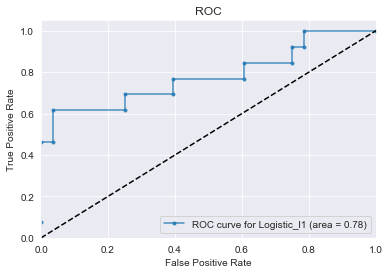

In [26]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_roc("Logistic_l1",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [1.         0.92307692 0.92307692 0.84615385 0.84615385 0.84615385
 0.84615385 0.84615385 0.76923077 0.76923077 0.76923077 0.76923077
 0.76923077 0.76923077 0.76923077 0.69230769 0.69230769 0.69230769
 0.69230769 0.69230769 0.61538462 0.61538462 0.61538462 0.61538462
 0.61538462 0.61538462 0.61538462 0.53846154 0.46153846 0.46153846
 0.38461538 0.30769231 0.23076923 0.15384615 0.07692308 0.        ]
precision [0.37142857 0.35294118 0.36363636 0.34375    0.35483871 0.36666667
 0.37931034 0.39285714 0.37037037 0.38461538 0.4        0.41666667
 0.43478261 0.45454545 0.47619048 0.45       0.47368421 0.5
 0.52941176 0.5625     0.53333333 0.57142857 0.61538462 0.66666667
 0.72727273 0.8        0.88888889 0.875      0.85714286 1.
 1.         1.         1.         1.         1.         1.        ]
thresholds [7.69092426e-10 5.79682100e-09 6.07410831e-07 6.27345050e-07
 8.49325487e-07 8.53841383e-07 9.52692592e-06 2.02788859e-05
 2.09531428e-05 3.25359493e-05 6.18542654e-05 8.03384030e-0

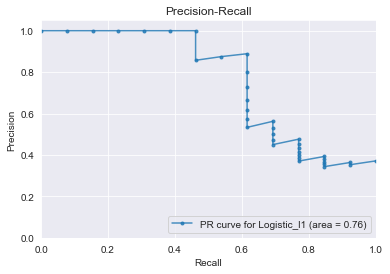

In [27]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("Logistic_l1",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [1.         0.92307692 0.92307692 0.84615385 0.84615385 0.84615385
 0.84615385 0.84615385 0.76923077 0.76923077 0.76923077 0.76923077
 0.76923077 0.76923077 0.76923077 0.69230769 0.69230769 0.69230769
 0.69230769 0.69230769 0.61538462 0.61538462 0.61538462 0.61538462
 0.61538462 0.61538462 0.61538462 0.53846154 0.46153846 0.46153846
 0.38461538 0.30769231 0.23076923 0.15384615 0.07692308 0.        ]
precision [0.13248905 0.12354277 0.12867742 0.11921739 0.12444571 0.13015254
 0.13640675 0.14329104 0.13196786 0.13907968 0.147      0.155875
 0.16588836 0.17727411 0.19033515 0.17461111 0.18878979 0.20547059
 0.22537993 0.24955556 0.22814286 0.25643119 0.29271728 0.34095122
 0.40819708 0.50845455 0.67393976 0.644      0.60798551 0.999
 0.999      0.999      0.999      0.999      0.999      0.999     ]
thresholds [7.69092426e-10 5.79682100e-09 6.07410831e-07 6.27345050e-07
 8.49325487e-07 8.53841383e-07 9.52692592e-06 2.02788859e-05
 2.09531428e-05 3.25359493e-05 6.18542654e-05 8.033

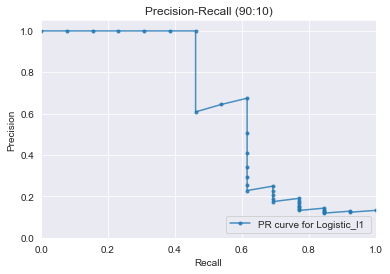

In [28]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Logistic_l1",gsCV.best_estimator_ , y_test, X_test, labe=15)

In [29]:
best_features=gsCV.best_estimator_.coef_[0]
feature_importance=pd.DataFrame(best_features,columns=['Importance'])
feature_importance['Features']=data_labels
print("Number of features:", len(feature_importance[feature_importance['Importance']>0]))
feature_importance[feature_importance['Importance']>0]

Number of features: 28


,Importance,Features
17,1.405231e-03,CD47
21,5.539459e-04,FAM46C
25,1.758893e-05,SFRP2
27,2.474690e-04,AKAP12
28,2.034962e-03,S100A4
44,4.161336e-03,MYADM
49,7.077361e-04,XBP1
52,1.512248e-03,PDE5A
53,1.643625e-05,TG
60,2.885142e-04,CCND2


## Random Forest

In [31]:
num_of_crossval = 5

#To store output
classArray_train = np.zeros(len(y_train))
classArray_test = np.zeros((len(y_test), num_of_crossval))
#kf = cross_validation.StratifiedKFold(y_train, n_folds=num_of_crossval, shuffle=False)
#X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
#Number of trees for grid search(drawing the graph to find the optimum parameter)
tune_params = [{'n_estimators': [10, 100, 150, 200, 250, 300, 400, 500]}]
#tune_params = [{'n_estimators': [ 400]}]
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training Starting ... ')
model=RandomForestClassifier(n_estimators=100, class_weight='auto',random_state=1)
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted', cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.cv_results_)
print(gsCV.best_estimator_)
rf_best=gsCV.best_estimator_

Fold : 0
Training Starting ... 
Create model ... 


ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample". Given "auto".

fpr [ 0.          0.          0.03571429  0.03571429  0.14285714  0.14285714
  0.21428571  0.21428571  0.25        0.25        1.        ]
tpr [ 0.07692308  0.23076923  0.23076923  0.76923077  0.76923077  0.84615385
  0.84615385  0.92307692  0.92307692  1.          1.        ]
thresholds [ 0.634  0.512  0.508  0.45   0.358  0.334  0.328  0.324  0.31   0.306
  0.028]


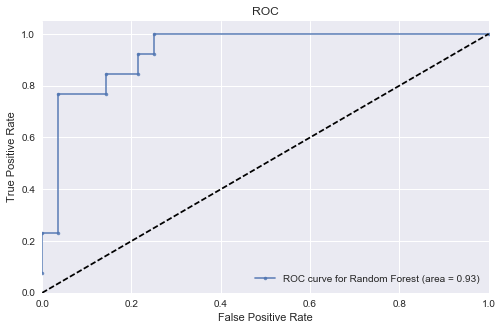

In [143]:

#mpl.rcParams['figure.figsize']=(6.0,4.0)
#ax=make_roc("Random Forrest",rf_best , y_test, X_test, labe=15)

mpl.rcParams['figure.figsize']=(8.0,5.0)
ax=make_roc("Random Forest",rf_best , y_test, X_test, file='RF-test-roc.png')

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.84615385
  0.76923077  0.76923077  0.76923077  0.76923077  0.69230769  0.61538462
  0.53846154  0.46153846  0.38461538  0.30769231  0.23076923  0.23076923
  0.15384615  0.07692308  0.        ]
precision [ 0.65        0.63157895  0.66666667  0.64705882  0.6875      0.73333333
  0.71428571  0.76923077  0.83333333  0.90909091  0.9         0.88888889
  0.875       0.85714286  0.83333333  0.8         0.75        1.          1.
  1.          1.        ]
thresholds [ 0.306  0.31   0.324  0.328  0.33   0.334  0.358  0.374  0.448  0.45
  0.476  0.48   0.484  0.49   0.498  0.502  0.508  0.512  0.588  0.634]


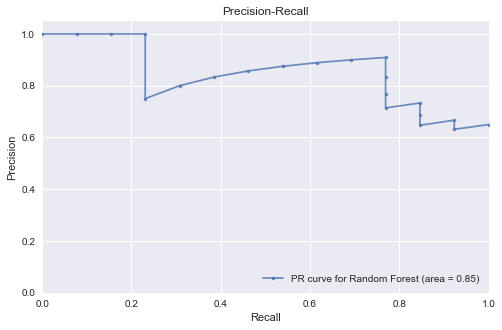

In [125]:
mpl.rcParams['figure.figsize']=(8.0,5.0)
ax=make_pr("Random Forest",rf_best, y_test, X_test, labe=15,file='RF-test-pr.png')

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.84615385
  0.76923077  0.76923077  0.76923077  0.76923077  0.69230769  0.61538462
  0.53846154  0.46153846  0.38461538  0.30769231  0.23076923  0.23076923
  0.15384615  0.07692308  0.        ]
precision [ 0.3245      0.30720513  0.34095122  0.32167782  0.36267925  0.41564865
  0.39270787  0.46297351  0.56383871  0.72085567  0.69922222  0.67393976
  0.644       0.60798551  0.56383871  0.50845455  0.43691667  0.999       0.999
  0.999       0.999     ]
thresholds [ 0.306  0.31   0.324  0.328  0.33   0.334  0.358  0.374  0.448  0.45
  0.476  0.48   0.484  0.49   0.498  0.502  0.508  0.512  0.588  0.634]


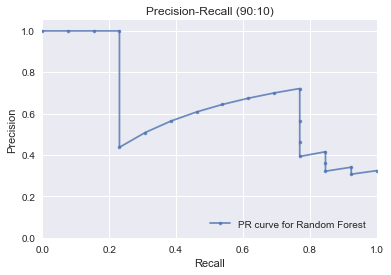

In [74]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Random Forest",rf_best , y_test, X_test, labe=15)

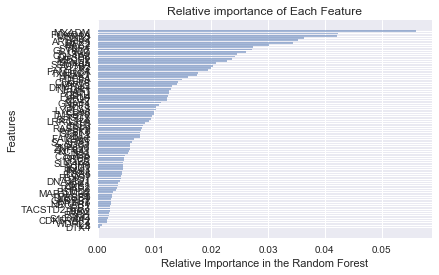

In [55]:

importance_list = rf_best.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
temp=pd.DataFrame(sorted(zip(importance_list, name_list)), columns=['Importance','Feature'])
feature_importance_rf=temp[temp['Importance']>0]
plt.barh(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Importance, align='center', alpha=0.5)
plt.yticks(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Feature)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
old=mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize']=(6.0,30.0)
plt.show()
#mpl.rcParams['figure.figsize']=(6.0,4.0)

## AdaBoost 

In [86]:
num_of_crossval=4
tune_params = {"n_estimators":[30, 40,50,100,150,200,300] }
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training ... ')
model=AdaBoostClassifier(n_estimators=100, random_state=1)
gsCV = GridSearchCV(model, tune_params,scoring='f1_weighted', cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.grid_scores_)
for params, mean_score, scores in gsCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

Fold : 0
Training ... 
Create model ... 
Training complete ... 
{'n_estimators': 100}
[mean: 0.68838, std: 0.10668, params: {'n_estimators': 30}, mean: 0.76448, std: 0.04305, params: {'n_estimators': 40}, mean: 0.76633, std: 0.04174, params: {'n_estimators': 50}, mean: 0.78392, std: 0.05149, params: {'n_estimators': 100}, mean: 0.78392, std: 0.05149, params: {'n_estimators': 150}, mean: 0.75059, std: 0.09633, params: {'n_estimators': 200}, mean: 0.76894, std: 0.11009, params: {'n_estimators': 300}]
0.688 (+/-0.213) for {'n_estimators': 30}
0.764 (+/-0.086) for {'n_estimators': 40}
0.766 (+/-0.083) for {'n_estimators': 50}
0.784 (+/-0.103) for {'n_estimators': 100}
0.784 (+/-0.103) for {'n_estimators': 150}
0.751 (+/-0.193) for {'n_estimators': 200}
0.769 (+/-0.220) for {'n_estimators': 300}


fpr [ 0.          0.          0.03571429  0.03571429  0.10714286  0.10714286
  0.17857143  0.17857143  0.21428571  0.21428571  0.25        0.25
  0.28571429  0.28571429  0.32142857  0.32142857  1.        ]
tpr [ 0.07692308  0.30769231  0.30769231  0.46153846  0.46153846  0.53846154
  0.53846154  0.61538462  0.61538462  0.69230769  0.69230769  0.84615385
  0.84615385  0.92307692  0.92307692  1.          1.        ]
thresholds [ 0.71849778  0.62110436  0.59941855  0.56654398  0.54765916  0.54435747
  0.52526236  0.50917456  0.49563801  0.48088502  0.44151169  0.43515448
  0.43425971  0.41719455  0.40355916  0.38650618  0.10529919]


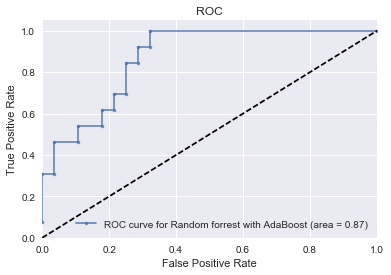

In [87]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_roc("Random forrest with AdaBoost",gsCV , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.76923077
  0.69230769  0.69230769  0.61538462  0.61538462  0.53846154  0.53846154
  0.53846154  0.46153846  0.46153846  0.46153846  0.38461538  0.30769231
  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.59090909  0.57142857  0.6         0.57894737  0.61111111  0.58823529
  0.5625      0.6         0.57142857  0.61538462  0.58333333  0.63636364
  0.7         0.66666667  0.75        0.85714286  0.83333333  0.8         1.
  1.          1.          1.          1.        ]
thresholds [ 0.38650618  0.40355916  0.41719455  0.43425971  0.43515448  0.43677911
  0.44151169  0.48088502  0.49563801  0.50917456  0.52526236  0.52772479
  0.54435747  0.54765916  0.55485176  0.56654398  0.58762458  0.59941855
  0.62110436  0.64629289  0.67614162  0.71849778]


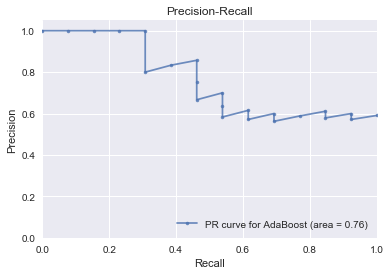

In [88]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("AdaBoost",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.76923077
  0.69230769  0.69230769  0.61538462  0.61538462  0.53846154  0.53846154
  0.53846154  0.46153846  0.46153846  0.46153846  0.38461538  0.30769231
  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.27199401  0.25643119  0.27953333  0.26234471  0.289       0.26981081
  0.24955556  0.27953333  0.25643119  0.29271728  0.26584783  0.31161146
  0.37638462  0.34095122  0.43691667  0.60798551  0.56383871  0.50845455
  0.999       0.999       0.999       0.999       0.999     ]
thresholds [ 0.38650618  0.40355916  0.41719455  0.43425971  0.43515448  0.43677911
  0.44151169  0.48088502  0.49563801  0.50917456  0.52526236  0.52772479
  0.54435747  0.54765916  0.55485176  0.56654398  0.58762458  0.59941855
  0.62110436  0.64629289  0.67614162  0.71849778]


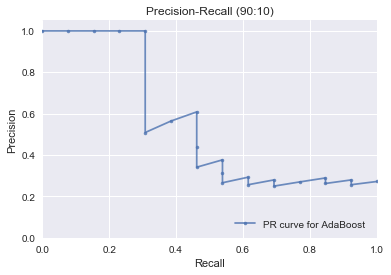

In [89]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("AdaBoost",gsCV.best_estimator_ , y_test, X_test, labe=15)

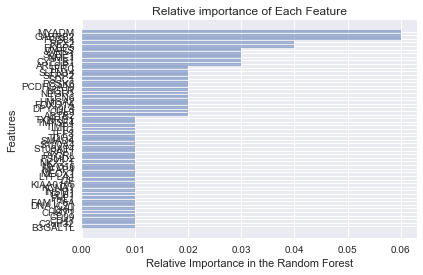

In [90]:
gsCV.best_estimator_.feature_importances_
importance_list = gsCV.best_estimator_.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
temp=pd.DataFrame(sorted(zip(importance_list, name_list)), columns=['Importance','Feature'])
feature_importance_rf=temp[temp['Importance']>0]
plt.barh(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Importance, align='center', alpha=0.5)
plt.yticks(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Feature)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
old=mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize']=(6.0,10.0)
plt.show()

## Gradient Boosting 

In [92]:

num_of_crossval=4
tune_params ={"n_estimators": [5,8,10,17,20,100,150],"max_depth":[1,2,3,4,5]}
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training Starting ... ')
model=GradientBoostingClassifier()
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted',cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.grid_scores_)
for params, mean_score, scores in gsCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
print(gsCV.best_estimator_)

Fold : 0
Training Starting ... 
Create model ... 


/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training complete ... 
{'max_depth': 1, 'n_estimators': 17}
[mean: 0.61346, std: 0.07293, params: {'max_depth': 1, 'n_estimators': 5}, mean: 0.60567, std: 0.05971, params: {'max_depth': 1, 'n_estimators': 8}, mean: 0.60567, std: 0.05971, params: {'max_depth': 1, 'n_estimators': 10}, mean: 0.78072, std: 0.07322, params: {'max_depth': 1, 'n_estimators': 17}, mean: 0.70691, std: 0.12359, params: {'max_depth': 1, 'n_estimators': 20}, mean: 0.75438, std: 0.13237, params: {'max_depth': 1, 'n_estimators': 100}, mean: 0.75755, std: 0.14192, params: {'max_depth': 1, 'n_estimators': 150}, mean: 0.61404, std: 0.10809, params: {'max_depth': 2, 'n_estimators': 5}, mean: 0.66245, std: 0.09379, params: {'max_depth': 2, 'n_estimators': 8}, mean: 0.67079, std: 0.09771, params: {'max_depth': 2, 'n_estimators': 10}, mean: 0.62290, std: 0.12628, params: {'max_depth': 2, 'n_estimators': 17}, mean: 0.66548, std: 0.08438, params: {'max_depth': 2, 'n_estimators': 20}, mean: 0.65412, std: 0.09722, params: {'ma

fpr [ 0.          0.          0.03571429  0.03571429  0.10714286  0.10714286
  0.14285714  0.17857143  0.25        0.32142857  0.32142857  0.35714286
  0.39285714  0.46428571  0.53571429  0.67857143  1.        ]
tpr [ 0.07692308  0.15384615  0.23076923  0.30769231  0.30769231  0.69230769
  0.69230769  0.76923077  0.76923077  0.84615385  0.92307692  1.          1.
  1.          1.          1.          1.        ]
thresholds [ 0.73116842  0.61453203  0.60845867  0.57563312  0.5330349   0.40412778
  0.38233082  0.34497589  0.3426769   0.34211264  0.30983978  0.30726894
  0.27639808  0.23763588  0.18343938  0.17159028  0.14853734]


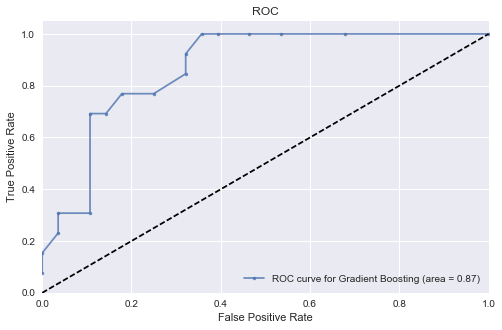

In [93]:
mpl.rcParams['figure.figsize']=(8.0,5.0)
ax=make_roc("Gradient Boosting",gsCV , y_test, X_test, file='GBRF-17-2-test-roc.png')

recall [ 1.          0.92307692  0.84615385  0.76923077  0.76923077  0.69230769
  0.69230769  0.61538462  0.53846154  0.46153846  0.38461538  0.30769231
  0.30769231  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.56521739  0.57142857  0.55        0.58823529  0.66666667  0.69230769
  0.75        0.72727273  0.7         0.66666667  0.625       0.57142857
  0.66666667  0.8         0.75        1.          1.          1.        ]
thresholds [ 0.30726894  0.30983978  0.34211264  0.3426769   0.34497589  0.38233082
  0.40412778  0.45769271  0.46224638  0.48164347  0.49270091  0.5330349
  0.56937635  0.57563312  0.60845867  0.61453203  0.73116842]


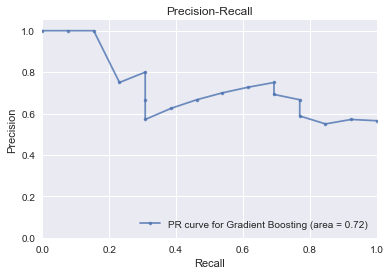

In [94]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("Gradient Boosting",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.84615385  0.76923077  0.76923077  0.69230769
  0.69230769  0.61538462  0.53846154  0.46153846  0.38461538  0.30769231
  0.30769231  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.25163158  0.25643119  0.2401875   0.26981081  0.34095122  0.36788889
  0.43691667  0.40819708  0.37638462  0.34095122  0.30124138  0.25643119
  0.34095122  0.50845455  0.43691667  0.999       0.999       0.999     ]
thresholds [ 0.30726894  0.30983978  0.34211264  0.3426769   0.34497589  0.38233082
  0.40412778  0.45769271  0.46224638  0.48164347  0.49270091  0.5330349
  0.56937635  0.57563312  0.60845867  0.61453203  0.73116842]


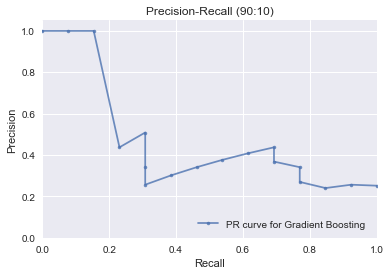

In [95]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Gradient Boosting",gsCV.best_estimator_ , y_test, X_test, labe=15)

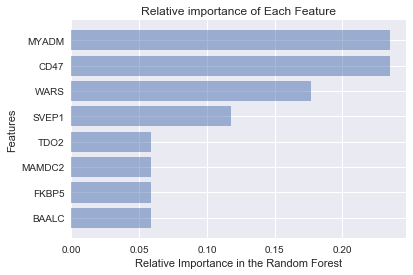

In [96]:
gsCV.best_estimator_.feature_importances_
importance_list = gsCV.best_estimator_.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
temp=pd.DataFrame(sorted(zip(importance_list, name_list)), columns=['Importance','Feature'])
feature_importance_rf=temp[temp['Importance']>0]
plt.barh(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Importance, align='center', alpha=0.5)
plt.yticks(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Feature)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
old=mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize']=(6.0,10.0)
plt.show()

In [216]:
classArray_test_final = np.mean(classArray_test, axis=1) > 0.5

In [217]:
GBRF=gsCV.best_estimator_

In [97]:
pd.DataFrame(rf_best.predict_proba(X_test),rf_best.predict(X_test))

,0,1
1,0.492,0.508
0,0.864,0.136
0,0.666,0.334
0,0.552,0.448
0,0.520,0.480
0,0.740,0.260
0,0.672,0.328
0,0.718,0.282
1,0.412,0.588
1,0.498,0.502


In [98]:
classArray_test=np.array(pd.DataFrame(rf_best.predict_proba(X_test),rf_best.predict(X_test)))

In [111]:
output=[]
for i in range(0,len(classArray_test)):
    if(classArray_test[i][1]>0.449):
        output.append(1)
    else:
        output.append(0)
print(confusion_matrix(y_test, output))

[[27  1]
 [ 3 10]]


In [138]:
len(y_test)

41

In [112]:
print(confusion_matrix(y_test, output))

[[27  1]
 [ 3 10]]


In [126]:
def show_confusion_matrix(C,class_labels=['0','1'],file=''):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    #tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];
    tn = 27; fp = 3; fn = 1; tp = 10;

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.set_facecolor((1, 1, 1))
    ax.imshow([[20,  1],[ 1, 20]], interpolation='nearest', cmap=plt.cm.copper)
    
    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[-0.5,-0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[2.5,2.5], '-k', lw=2)

    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    ax.plot([-0.5,-0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([2.5,2.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=20)
    ax.grid(False)
    ax.set_frame_on(True)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''],fontsize=20)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=20, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90,fontsize=20)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)

    mpl.rcParams['figure.figsize']=(6.0,4.0)
    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d'%(tn),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d'%(tp),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%(((tp+tn+0.)/N)*100)+'%',size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))


    plt.tight_layout()
    
    plt.savefig(file)

In [131]:
mat=confusion_matrix(y_test, output)
len(y_test)

41

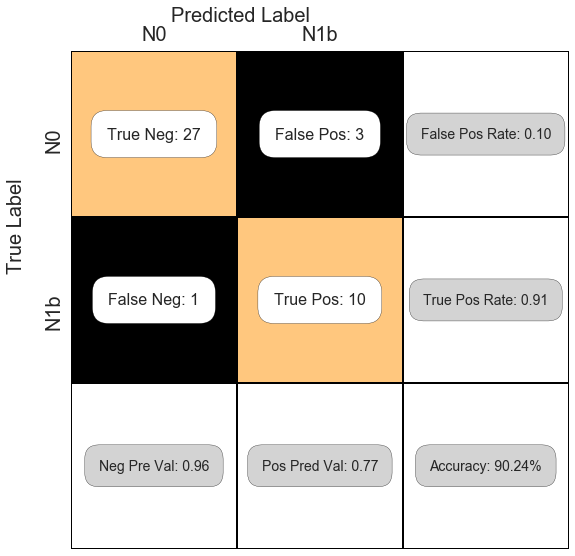

In [128]:
from sklearn.metrics import confusion_matrix
#from show_confusion_matrix import show_confusion_matrix
plt.figure()
mat=confusion_matrix(y_test, output)
show_confusion_matrix(confusion_matrix(y_test, output), ['N0','N1b'],'CM-GBRF.png')
mpl.rcParams['figure.figsize']=(2.0,1.0)

In [135]:
def show_confusion_matrix(class_labels=['0','1'],file=''):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    #assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    #tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];
    tn = 85; fp = 5; fn = 2; tp = 8;
    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.set_facecolor((1, 1, 1))
    ax.imshow([[20,  1],[ 1, 20]], interpolation='nearest', cmap=plt.cm.copper)
    
    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[-0.5,-0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[2.5,2.5], '-k', lw=2)

    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    ax.plot([-0.5,-0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([2.5,2.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=20)
    ax.grid(False)
    ax.set_frame_on(True)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''],fontsize=20)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=20, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90,fontsize=20)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)
    
    mpl.rcParams['figure.figsize']=(6.0,4.0)
    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            '%d'%(tn),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))

    ax.text(0,1,
            '%d'%fn,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))

    ax.text(1,0,
            '%d'%fp,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))


    ax.text(1,1,
            '%d'%(tp),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))
    
   
    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'FPR: %.2f'%(fp / (fp+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))

    ax.text(2,1,
            'TPR: %.2f'%(tp / (tp+fn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%(((tp+tn+0.)/N)*100)+'%',size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))
    
    ax.text(0,2,
            'NPV: %.2f'%(1-fn/(fn+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))

    ax.text(1,2,
            'PPV: %.2f'%(tp/(tp+fp+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))


    plt.tight_layout()
    
    plt.savefig(file)

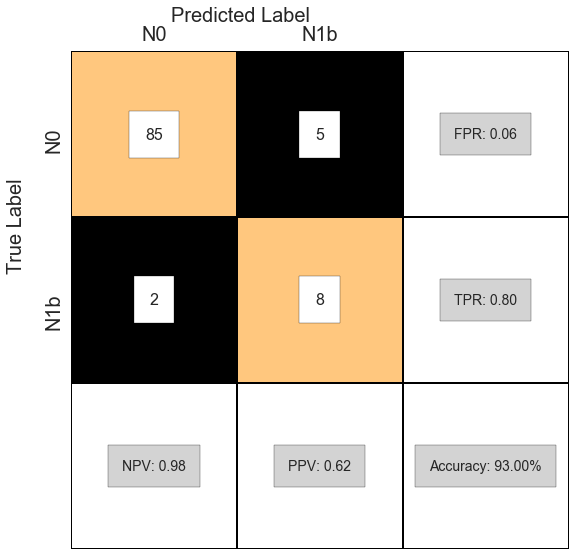

In [136]:
from sklearn.metrics import confusion_matrix
#from show_confusion_matrix import show_confusion_matrix
plt.figure()
mat=[[83,7],[3,7]]
mat[0]=[27,1]
mat[1]=[3,10]
show_confusion_matrix(['N0','N1b'],'CM-GBRF-temp5.png')
mpl.rcParams['figure.figsize']=(2.0,1.0)

In [50]:
print(confusion_matrix(y_test, output))

[[23  5]
 [ 4  9]]


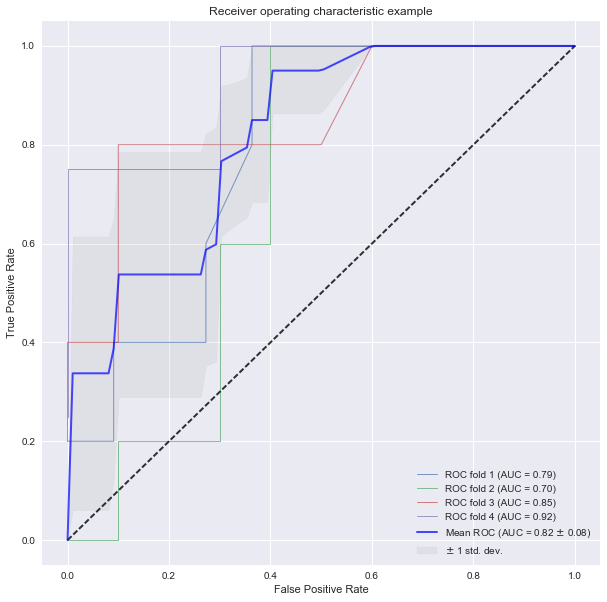

In [109]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=4)
classifier = RandomForestClassifier(n_estimators=150, class_weight='auto')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
mpl.rcParams['figure.figsize']=(10.0,10.0)
i = 0
for train, test in cv.split(X_train, y_train):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
          alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.7)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.1,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

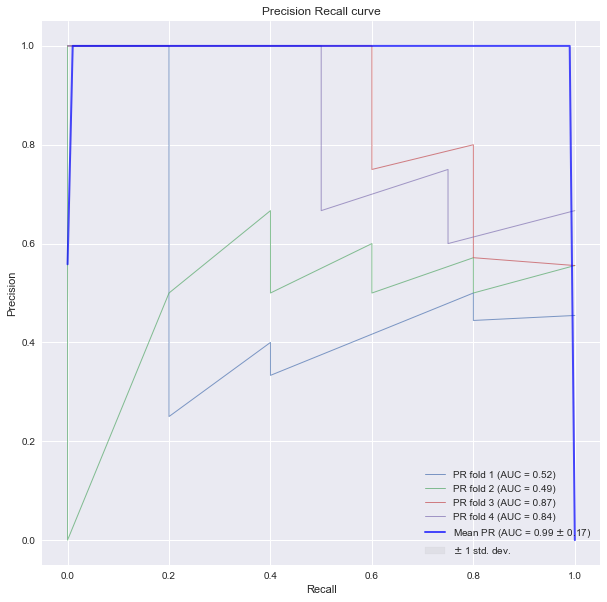

In [113]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=4)
classifier = RandomForestClassifier(n_estimators=200, class_weight='auto')

precisions = []
aucs = []
mean_recall = np.linspace(1, 0, 100)
mpl.rcParams['figure.figsize']=(10.0,10.0)
i = 0
for train, test in cv.split(X_train, y_train):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    precision, recall, thresholds = precision_recall_curve(y_train[test], probas_[:, 1])
    average_precision = average_precision_score(y_train[test], probas_[:, 1])
    
    precisions.append(interp(mean_recall, recall, precision))
    precisions[-1][0] = 0.0
    pr_auc = average_precision
    aucs.append(pr_auc)
    plt.plot(recall, precision, lw=1, alpha=0.7,
             label='PR fold %d (AUC = %0.2f)' % (i+1, pr_auc))

    i += 1


mean_precision = np.mean(precisions, axis=0)
#mean_precision[-1] = 1.0
mean_auc = auc(mean_recall, mean_precision)
std_auc = np.std(aucs)
plt.plot(mean_recall, mean_precision, color='b',
         label=r'Mean PR (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.7)

std_precision = np.std(precisions, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)
plt.fill_between(mean_recall, precisions_lower, precisions_upper, color='grey', alpha=.1,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend(loc="lower right")
plt.show()

In [116]:
len(precisions[0])

100

In [169]:
feature_importances=pd.DataFrame(data.columns,columns=['Feature'])
for i in range(0,50):
    kf = cross_validation.StratifiedKFold(y_all, n_folds=2, shuffle=True)
    for train_index, test_index in kf:
        X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_all[train_index], X_all[test_index], y_all[train_index], \
                                                   y_all[test_index]
        model=GradientBoostingClassifier(max_depth=2,n_estimators=17)
        model.fit(X_train_kf, y_train_kf)
        
        
        importance_list_boo = model.feature_importances_
        name_list = data.columns
        importance_list_boo, name_list_boo = zip(*sorted(zip(importance_list_boo, name_list)))
        temp_boo=pd.DataFrame(sorted(zip(importance_list_boo, name_list_boo)), columns=['Importance','Feature'])
        #feature_importance_boo=temp_boo[temp_boo['Importance']>0]
        feature_importance_boo=temp_boo
        feature_importances_temp=pd.merge(feature_importances,feature_importance_boo,on ='Feature',how='outer')
        feature_importances=feature_importances_temp
    

In [405]:
feature_importances.to_csv('Feature_importances.txt',sep="\t")


In [1025]:
logistic_l1=[]
logistic_l2=[]
random_forest=[]
adaBoost=[]
gradientBoosting=[]
for i in range(1,100):
    # Split testing and training sets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size=0.40,stratify=y_all, random_state=i)
    num_of_crossval = 5
    
    # L2 regression
    tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
    final_Results_mat = []
    fold = 0
    model=LogisticRegression(C=100,penalty='l2')
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision',cv=num_of_crossval, n_jobs=1)    
    gsCV.fit(X_train, y_train)
    logistic_l2.append(gsCV.best_estimator_)
    
    # L1 regression
    tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
    final_Results_mat = []
    fold = 0
    model=LogisticRegression(C=100,penalty='l1')
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision',cv=num_of_crossval, n_jobs=1)    
    gsCV.fit(X_train, y_train)
    logistic_l1.append(gsCV.best_estimator_)
    
    # Random Forest
    classArray_train = np.zeros(len(y_train))
    classArray_test = np.zeros((len(y_test), num_of_crossval))
    tune_params = [{'n_estimators': [10, 20, 50, 100, 150, 200, 250, 300, 400, 450, 500]}]
    final_Results_mat = []
    fold = 0
    model=RandomForestClassifier(n_estimators=100, class_weight='auto')
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision', cv=num_of_crossval, n_jobs=1)
    gsCV.fit(X_train, y_train)
    random_forest.append(gsCV.best_estimator_)
    
    # AdaBoost
    tune_params = {"n_estimators":[30, 40,50,100,150,200,300] }
    final_Results_mat = []
    fold = 0
    model=AdaBoostClassifier(n_estimators=100)
    gsCV = GridSearchCV(model, tune_params,scoring='average_precision', cv=num_of_crossval, n_jobs=1)    
    gsCV.fit(X_train, y_train)
    adaBoost.append(gsCV.best_estimator_)
    
    # Gradient Boost
    tune_params ={"n_estimators": [5,8,10,17,20,100,150],"max_depth":[1,2,3,4,5]}
    final_Results_mat = []
    fold = 0
    model=GradientBoostingClassifier()
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision',cv=num_of_crossval, n_jobs=1)
    gsCV.fit(X_train, y_train)
    gradientBoosting.append(gsCV.best_estimator_)

KeyboardInterrupt: 

In [ ]:
adaBoost[9]

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.76923077
  0.76923077  0.69230769  0.69230769  0.61538462  0.53846154  0.53846154
  0.46153846  0.38461538  0.30769231  0.23076923  0.15384615  0.07692308
  0.        ]
precision [ 0.72222222  0.70588235  0.75        0.73333333  0.78571429  0.76923077
  0.83333333  0.81818182  0.9         0.88888889  0.875       1.          1.
  1.          1.          1.          1.          1.          1.        ]
thresholds [ 0.1654935   0.25368161  0.38127257  0.44035674  0.52453048  0.53280372
  0.55643808  0.62169145  0.85798357  0.86641347  0.87261793  0.88074205
  0.88378931  0.90184585  0.90304306  0.90820215  0.94477119  0.96110727]


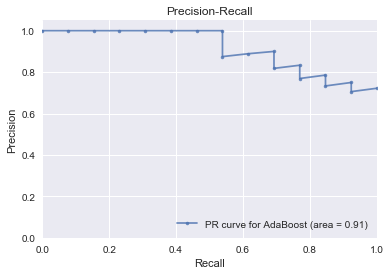

In [1021]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("AdaBoost",gradientBoosting[4] , y_test, X_test, labe=15)